# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 8 - Lab 01: Linear Regression Fundamentals
**Instructor:** Amir Charkhi | **Type:** Hands-On Practice

> Master Linear and Polynomial Regression

## 🎯 Lab Objectives

In this lab, you'll practice:
- Building and interpreting Linear Regression models
- Understanding coefficients and feature importance
- Detecting and handling overfitting
- Implementing Polynomial Regression
- Using regularization (Ridge, Lasso)

**Time**: 35-45 minutes  
**Difficulty**: ⭐⭐⭐☆☆ (Intermediate)

---

## 📚 Quick Reference

**Linear Regression:**
```python
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# Simple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Coefficients
coefficients = model.coef_
intercept = model.intercept_

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Regularization
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
```

---

In [3]:
# Setup - Run this cell first!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
print("✅ Setup complete! Let's master Linear Regression!")

✅ Setup complete! Let's master Linear Regression!


---

## 📊 Exercise 1: Simple Linear Regression

Let's start with the basics and build our first regression model!

### Task 1.1: Load and Explore the Dataset

In [6]:
# Load California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

print(f"Dataset loaded: {len(X)} samples, {X.shape[1]} features")
print(f"\nFeatures: {list(X.columns)}")

# TODO 1.1: Explore the data
# - Display first 5 rows
display(X.head())
# - Show summary statistics
display(X.describe())
# - Display target variable statistics (min, max, mean)
print("\nTarget variable (MedHouseVal) statistics:")
print(f"Min:  {y.min():.2f}")
print(f"Max:  {y.max():.2f}")
print(f"Mean: {y.mean():.2f}")

print("\n✅ Task 1.1 Complete!")

Dataset loaded: 20640 samples, 8 features

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000



Target variable (MedHouseVal) statistics:
Min:  0.15
Max:  5.00
Mean: 2.07

✅ Task 1.1 Complete!


### Task 1.2: Visualize Feature Relationships

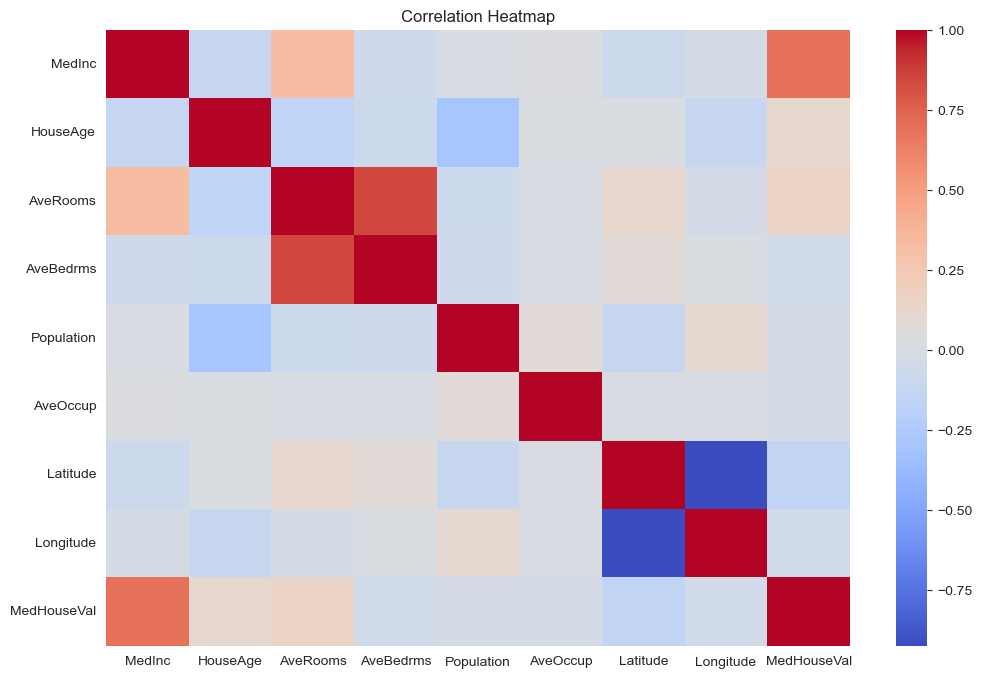

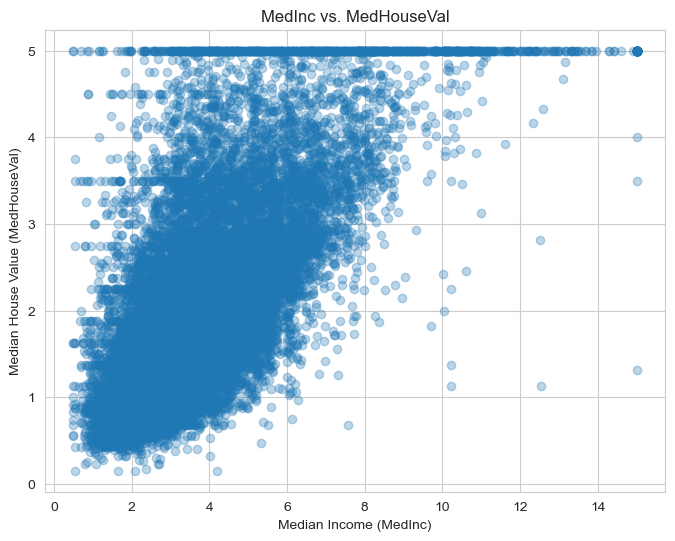


Top 3 features most correlated with MedHouseVal:
MedInc      0.688075
AveRooms    0.151948
HouseAge    0.105623
Name: MedHouseVal, dtype: float64

✅ Task 1.2 Complete!


In [7]:
# TODO 1.2: Create visualizations
# Requirements:
#   1. Create a correlation heatmap
#   2. Create scatter plot: MedInc vs target (most correlated feature)
#   3. Identify the top 3 features most correlated with target

import matplotlib.pyplot as plt
import seaborn as sns

df_combined = pd.concat([X, y], axis=1)

# 1. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 2. Scatter plot between MedInc and target
plt.figure(figsize=(8, 6))
plt.scatter(df_combined['MedInc'], df_combined['MedHouseVal'], alpha=0.3)
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value (MedHouseVal)")
plt.title("MedInc vs. MedHouseVal")
plt.show()

# 3. Top 3 correlated features with target
correlations = df_combined.corr()['MedHouseVal'].sort_values(ascending=False)

print("\nTop 3 features most correlated with MedHouseVal:")
print(correlations[1:4])  # Skip index 0 because it's the target itself

print("\n✅ Task 1.2 Complete!")


### Task 1.3: Build Your First Model

In [8]:
# TODO 1.3: Train a Linear Regression model
# Steps:
#   1. Split data (80/20, random_state=42)
#   2. Create and train LinearRegression model
#   3. Make predictions on test set
#   4. Calculate MAE, RMSE, and R² score

# Your code here:
# 1. Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Create and train LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Calculate MAE, RMSE, R²
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Validation (Don't modify)
print("Model Performance:")
print(f"  MAE:  ${mae*100:.2f}k")
print(f"  RMSE: ${rmse*100:.2f}k")
print(f"  R²:   {r2:.4f}")

if r2 > 0.5:
    print(f"\n✅ Good start! Model explains {r2*100:.1f}% of variance")
    print("🎉 Task 1.3 Complete!")
else:
    print("\n⚠️ Check your code - R² should be above 0.5")

Model Performance:
  MAE:  $53.32k
  RMSE: $74.56k
  R²:   0.5758

✅ Good start! Model explains 57.6% of variance
🎉 Task 1.3 Complete!


---

## 🔍 Exercise 2: Understanding Coefficients

Let's interpret what the model learned!

### Task 2.1: Analyze Feature Importance

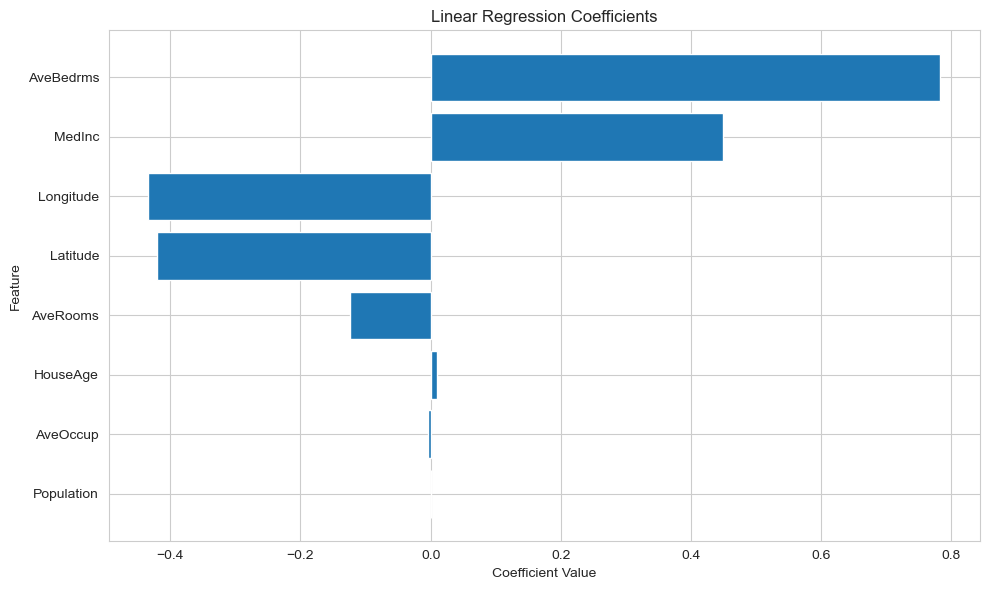


Intercept: -37.0233

💡 Interpretation:
  Positive coefficient = feature increases prediction
  Negative coefficient = feature decreases prediction
  Larger absolute value = stronger effect

✅ Task 2.1 Complete!


In [9]:
# TODO 2.1: Extract and visualize coefficients
# Requirements:
#   1. Get model coefficients and create a DataFrame
#   2. Sort by absolute coefficient value
#   3. Create a horizontal bar plot
#   4. Print the intercept

# Your code here:
coefficients = model.coef_              # 1D array of coefficients
intercept = model.intercept_            # Single intercept value

# Create DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value
coef_df['Abs'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs', ascending=True)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Linear Regression Coefficients")
plt.grid(True, axis='x')

plt.tight_layout()
plt.show()

print(f"\nIntercept: {intercept:.4f}")
print("\n💡 Interpretation:")
print("  Positive coefficient = feature increases prediction")
print("  Negative coefficient = feature decreases prediction")
print("  Larger absolute value = stronger effect")
print("\n✅ Task 2.1 Complete!")


### Task 2.2: Manual Prediction

In [10]:
# TODO 2.2: Make a manual prediction using the equation
# Linear Regression: y = intercept + coef1*x1 + coef2*x2 + ... + coefn*xn

# Get the first test sample
sample = X_test.iloc[0]
actual = y_test.iloc[0]
model_pred = model.predict(sample.values.reshape(1, -1))[0]

print("Sample features:")
print(sample)

# Your code here:
# Calculate prediction manually: intercept + sum of (coefficient * feature value)
manual_pred = intercept + np.sum(coefficients * sample.values)


# Validation (Don't modify)
print(f"\nManual prediction: {manual_pred:.4f}")
print(f"Model prediction:  {model_pred:.4f}")
print(f"Actual value:      {actual:.4f}")

if abs(manual_pred - model_pred) < 0.01:
    print("\n✅ Perfect! You understand the linear equation!")
    print("🎉 Task 2.2 Complete!")
else:
    print("\n⚠️ Manual and model predictions should match")

Sample features:
MedInc           1.681200
HouseAge        25.000000
AveRooms         4.192201
AveBedrms        1.022284
Population    1392.000000
AveOccup         3.877437
Latitude        36.060000
Longitude     -119.010000
Name: 20046, dtype: float64

Manual prediction: 0.7191
Model prediction:  0.7191
Actual value:      0.4770

✅ Perfect! You understand the linear equation!
🎉 Task 2.2 Complete!


---

## 📈 Exercise 3: Polynomial Regression

Sometimes relationships aren't perfectly linear - let's add some curves!

### Task 3.1: Generate Non-Linear Data

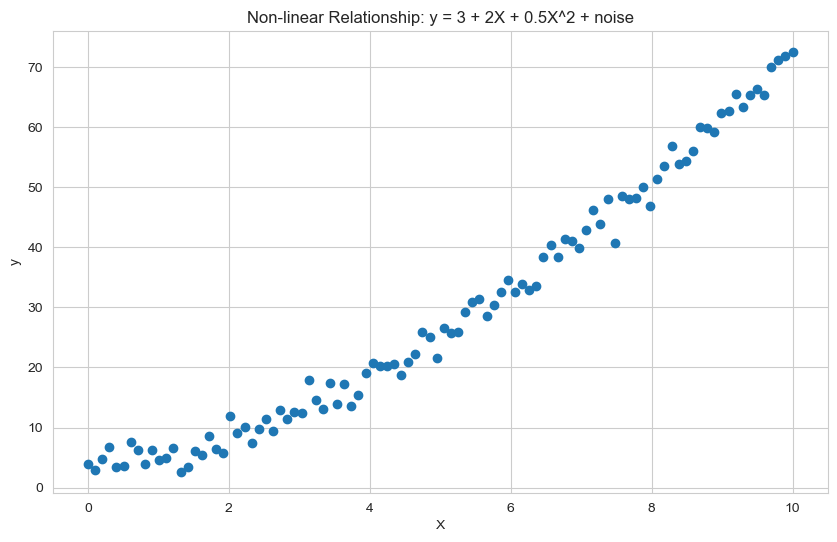

💡 Notice the curved pattern - linear regression won't fit perfectly!
✅ Task 3.1 Complete!


In [11]:
# Create synthetic non-linear data
np.random.seed(42)
X_simple = np.linspace(0, 10, 100).reshape(-1, 1)
y_simple = 3 + 2*X_simple + 0.5*X_simple**2 + np.random.normal(0, 2, X_simple.shape)
y_simple = y_simple.flatten()

# TODO 3.1: Visualize the non-linear relationship
# Create a scatter plot to see the curve

plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Non-linear Relationship: y = 3 + 2X + 0.5X^2 + noise")
plt.grid(True)

plt.show()

print("💡 Notice the curved pattern - linear regression won't fit perfectly!")
print("✅ Task 3.1 Complete!")

### Task 3.2: Compare Linear vs Polynomial Regression

Model Comparison:
  Linear Regression R²:     0.9575
  Polynomial Regression R²: 0.9934
  Improvement: 0.0359


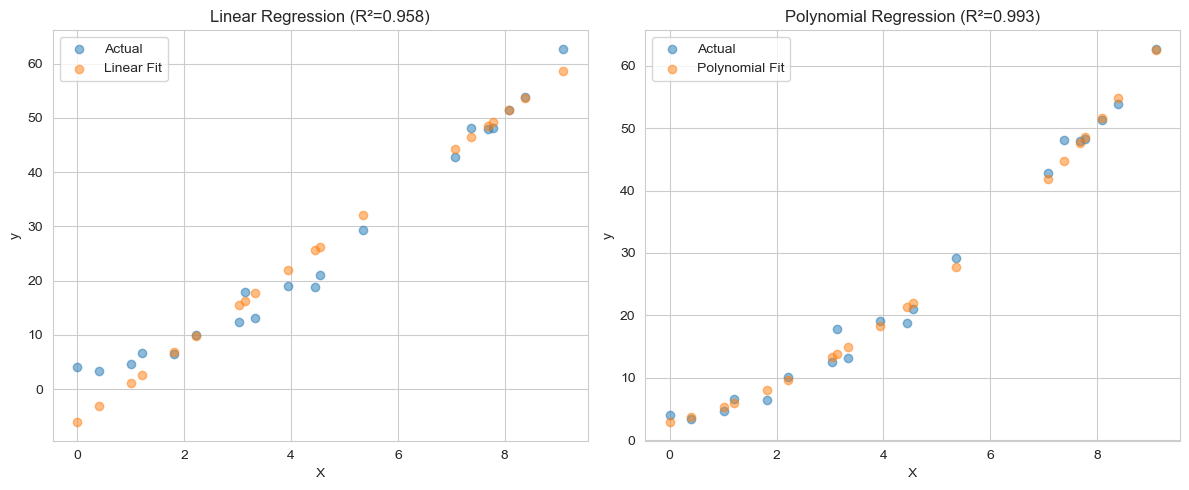


✅ Polynomial fits better for non-linear data!
🎉 Task 3.2 Complete!


In [12]:
# TODO 3.2: Fit both linear and polynomial regression
# Requirements:
#   1. Fit simple Linear Regression
#   2. Create polynomial features (degree=2)
#   3. Fit Linear Regression on polynomial features
#   4. Compare R² scores
#   5. Visualize both fits

# Split data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Your code here:
# 1. Linear model
linear_model = LinearRegression()
linear_model.fit(X_train_simple, y_train_simple)

y_pred_linear = linear_model.predict(X_test_simple)
r2_linear = r2_score(y_test_simple, y_pred_linear)

# 2. Polynomial model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_simple)
X_test_poly = poly.transform(X_test_simple)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_simple)

y_pred_poly = poly_model.predict(X_test_poly)
r2_poly = r2_score(y_test_simple, y_pred_poly)

# Validation and Visualization
print("Model Comparison:")
print(f"  Linear Regression R²:     {r2_linear:.4f}")
print(f"  Polynomial Regression R²: {r2_poly:.4f}")
print(f"  Improvement: {(r2_poly - r2_linear):.4f}")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test_simple, y_test_simple, alpha=0.5, label='Actual')
plt.scatter(X_test_simple, y_pred_linear, alpha=0.5, label='Linear Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Linear Regression (R²={r2_linear:.3f})')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test_simple, y_test_simple, alpha=0.5, label='Actual')
plt.scatter(X_test_simple, y_pred_poly, alpha=0.5, label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Regression (R²={r2_poly:.3f})')
plt.legend()

plt.tight_layout()
plt.show()

if r2_poly > r2_linear:
    print("\n✅ Polynomial fits better for non-linear data!")
    print("🎉 Task 3.2 Complete!")

### Task 3.3: Detecting Overfitting

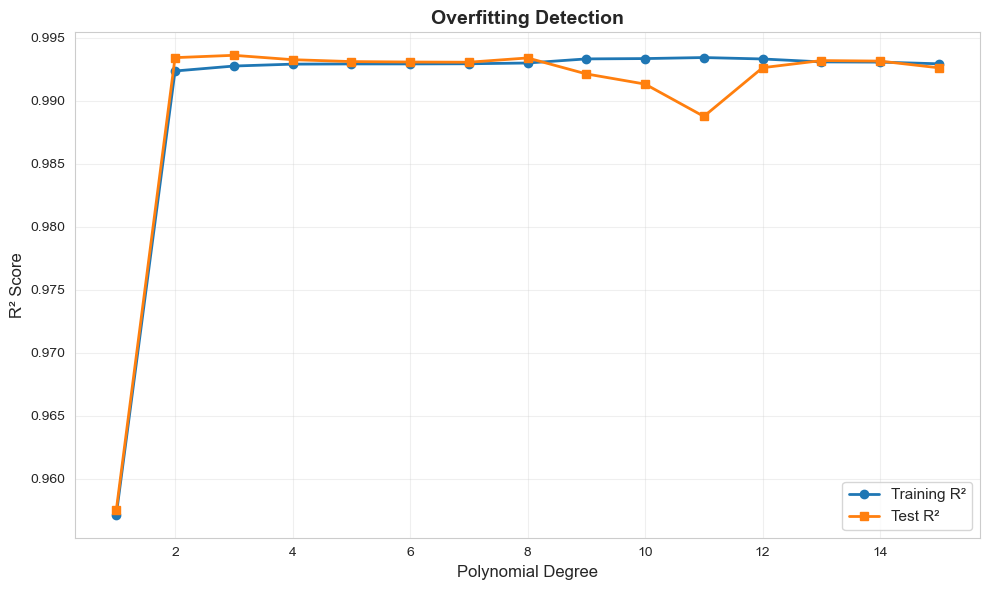


💡 Signs of Overfitting:
  - Training R² keeps improving
  - Test R² starts decreasing
  - Large gap between train and test scores

✅ Task 3.3 Complete!


In [13]:
# TODO 3.3: Explore what happens with very high polynomial degrees
# Requirements:
#   1. Try polynomial degrees from 1 to 15
#   2. Calculate train and test R² for each
#   3. Plot the results
#   4. Identify the overfitting point

# Your code here:
degrees = range(1, 16)
train_scores = []
test_scores = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    
    # Transform data
    X_train_poly = poly.fit_transform(X_train_simple)
    X_test_poly = poly.transform(X_test_simple)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train_simple)
    
    # Calculate R² on train and test
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    r2_train = r2_score(y_train_simple, y_train_pred)
    r2_test = r2_score(y_test_simple, y_test_pred)
    
    # Append to lists
    train_scores.append(r2_train)
    test_scores.append(r2_test)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', label='Training R²', linewidth=2)
plt.plot(degrees, test_scores, 's-', label='Test R²', linewidth=2)
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Overfitting Detection', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Signs of Overfitting:")
print("  - Training R² keeps improving")
print("  - Test R² starts decreasing")
print("  - Large gap between train and test scores")
print("\n✅ Task 3.3 Complete!")

---

## 🛡️ Exercise 4: Regularization

Prevent overfitting with Ridge and Lasso regression!

### Task 4.1: Compare Ridge and Lasso

In [4]:
# Back to California Housing with all features
# TODO 4.1: Compare Linear, Ridge, and Lasso Regression
# Requirements:
#   1. Standardize features (important for regularization!)
#   2. Train LinearRegression, Ridge(alpha=1.0), and Lasso(alpha=1.0)
#   3. Calculate test R² for each
#   4. Compare number of non-zero coefficients

# Use the housing data from Exercise 1
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Your code here:
# 1. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train three models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0)
}

results = []
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    
    # Count non-zero coefficients
    non_zero = np.sum(model.coef_ != 0)
    
    # Save results
    results.append({
        'Model': name,
        'R² Test Score': r2,
        'Non-Zero Coefficients': non_zero
    })

# Display results
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.to_string(index=False))

print("\n💡 Key Differences:")
print("  Ridge: Shrinks all coefficients but keeps all features")
print("  Lasso: Can reduce some coefficients to exactly zero (feature selection!)")
print("\n✅ Task 4.1 Complete!")


Model Comparison:
 Model  R² Test Score  Non-Zero Coefficients
Linear       0.575788                      8
 Ridge       0.575816                      8
 Lasso      -0.000219                      0

💡 Key Differences:
  Ridge: Shrinks all coefficients but keeps all features
  Lasso: Can reduce some coefficients to exactly zero (feature selection!)

✅ Task 4.1 Complete!


### Task 4.2: Tuning Regularization Strength

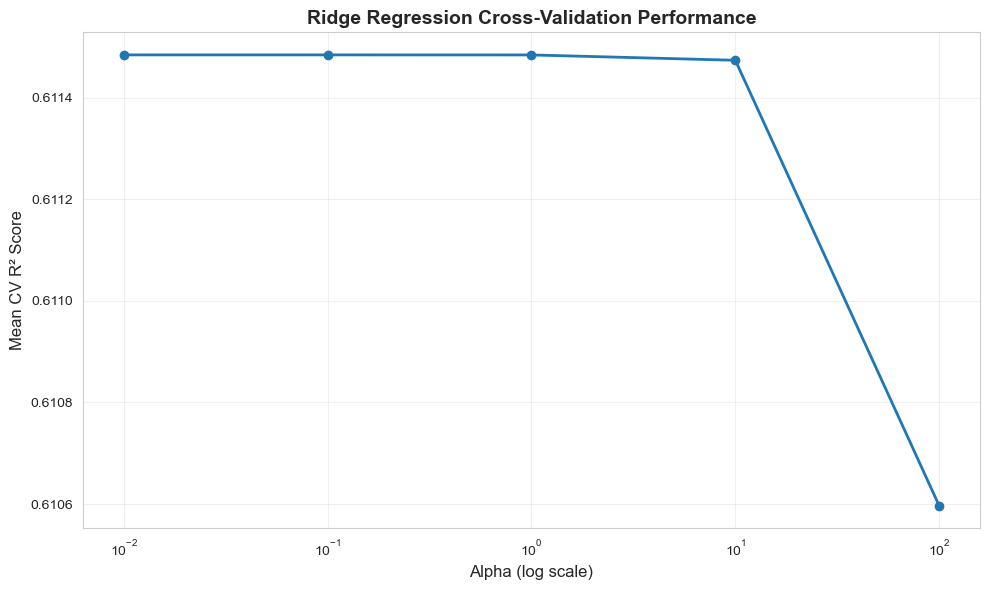


Best alpha: 0.01
Best CV R²: 0.6115

✅ Task 4.2 Complete!


In [5]:
# TODO 4.2: Find optimal alpha for Ridge regression
# Requirements:
#   1. Try different alpha values: [0.01, 0.1, 1, 10, 100]
#   2. Use cross-validation to evaluate each
#   3. Plot CV scores vs alpha
#   4. Identify best alpha

# Your code here:
alphas = [0.01, 0.1, 1, 10, 100]
cv_scores_list = []

for alpha in alphas:
    # Create Ridge model with this alpha
    ridge = Ridge(alpha=alpha)
    
    # Perform 5-fold cross-validation (use standardized data)
    scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')
    
    # Store mean CV score
    cv_scores_list.append(scores.mean())

# Visualize
plt.figure(figsize=(10, 6))
# Create plot of alpha vs CV scores
plt.plot(alphas, cv_scores_list, marker='o', linewidth=2)
plt.xscale('log')
plt.xlabel('Alpha (log scale)', fontsize=12)
plt.ylabel('Mean CV R² Score', fontsize=12)
plt.title('Ridge Regression Cross-Validation Performance', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find and print best alpha
best_idx = np.argmax(cv_scores_list)
best_alpha = alphas[best_idx]
best_score = cv_scores_list[best_idx]

print(f"\nBest alpha: {best_alpha}")
print(f"Best CV R²: {best_score:.4f}")
print("\n✅ Task 4.2 Complete!")

---

## 🎯 Exercise 5: Model Selection Challenge

Put everything together!

### Task 5.1: Choose the Best Approach

In [7]:
# TODO 5.1: Complete workflow to find the best model
# Given scenario: Predicting house prices with limited features
# Requirements:
#   1. Select only top 3 most important features from correlation
#   2. Try: Linear, Ridge, Lasso, Polynomial(degree=2) + Ridge
#   3. Use cross-validation for fair comparison
#   4. Select best model and evaluate on test set
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
print("🏠 Housing Price Prediction Challenge")
print("="*50)
# Your complete solution here:
# Step 1: Feature selection
# Compute correlations
corr = X.corrwith(y).abs().sort_values(ascending=False)

# Select top 3 most correlated features
top3_features = corr.index[:3].tolist()
print("Top 3 selected features:", top3_features)

X_selected = X[top3_features]

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Standardize (important for Ridge/Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Compare models with CV
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "Poly2 + Ridge": Pipeline([
        ("poly", PolynomialFeatures(degree=2)),
        ("ridge", Ridge(alpha=1.0))
    ])
}

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_results[name] = scores.mean()

print("\nCross-Validation Scores:")
for k, v in cv_results.items():
    print(f"  {k:<15}: {v:.4f}")

# Step 4: Train the best model and evaluate
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")

# Fit on the full training data
best_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)

print(f"\nTest Set R²: {r2_test:.4f}")
# Validation
print("\n" + "="*50)
if r2_test > 0.5:  # Replace with your test R²
    print("\n✅ Excellent! You've built a solid regression model!")
    print("\n💡 What you learned:")
    print("  - Linear regression basics")
    print("  - Polynomial features for non-linearity")
    print("  - Regularization to prevent overfitting")
    print("  - Model selection with cross-validation")
    print("\n🎉 Task 5.1 Complete!")
    print("🎉 Lab 01 Complete!")

🏠 Housing Price Prediction Challenge
Top 3 selected features: ['MedInc', 'AveRooms', 'Latitude']

Cross-Validation Scores:
  Linear         : 0.4865
  Ridge          : 0.4865
  Lasso          : -0.0003
  Poly2 + Ridge  : 0.4375

Best Model: Ridge

Test Set R²: 0.4703



---

## 🏆 Lab Complete!

### What You Practiced:

✅ **Exercise 1**: Simple Linear Regression basics  
✅ **Exercise 2**: Understanding and interpreting coefficients  
✅ **Exercise 3**: Polynomial Regression and overfitting  
✅ **Exercise 4**: Ridge and Lasso regularization  
✅ **Exercise 5**: Complete model selection workflow  

### Key Takeaways:

1. **Coefficients show feature importance** - positive/negative and magnitude matter
2. **Polynomial features capture non-linear relationships** but can overfit
3. **Regularization prevents overfitting** by penalizing large coefficients
4. **Ridge shrinks coefficients**, Lasso can **eliminate features**
5. **Always standardize** before applying regularization
6. **Cross-validation** helps find optimal hyperparameters

### When to Use Each:

- **Linear Regression**: Fast baseline, interpretable, works when relationships are linear
- **Polynomial**: When you see curves in scatter plots
- **Ridge**: When all features might be useful, prevents overfitting
- **Lasso**: When you want automatic feature selection

### Next Steps:

- Move to **Lab 02** for Decision Trees and Random Forests
- Try these techniques on your own datasets
- Experiment with different polynomial degrees and alpha values

**Outstanding work! 🎉**